In [454]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [455]:
df = pd.read_csv('/Users/rosemary/Downloads/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code 2.csv')

In [456]:
df.isnull().sum()

ZIP Code                                  0
Week Number                               0
Week Start                                0
Week End                                  0
CasesWeekly                             223
Cases - Cumulative                      223
Case Rate - Weekly                      223
Case Rate - Cumulative                  223
Tests - Weekly                          198
Tests - Cumulative                        0
Test Rate - Weekly                        0
Test Rate - Cumulative                    0
Percent Tested Positive - Weekly          0
Percent Tested Positive - Cumulative      0
DeathsWeekly                              0
Deaths - Cumulative                       0
Death Rate - Weekly                       0
Death Rate - Cumulative                   0
Population                                0
Row ID                                    0
ZIP Code Location                       122
dtype: int64

In [457]:
df = df.dropna()

In [458]:
df.isnull().sum()

ZIP Code                                0
Week Number                             0
Week Start                              0
Week End                                0
CasesWeekly                             0
Cases - Cumulative                      0
Case Rate - Weekly                      0
Case Rate - Cumulative                  0
Tests - Weekly                          0
Tests - Cumulative                      0
Test Rate - Weekly                      0
Test Rate - Cumulative                  0
Percent Tested Positive - Weekly        0
Percent Tested Positive - Cumulative    0
DeathsWeekly                            0
Deaths - Cumulative                     0
Death Rate - Weekly                     0
Death Rate - Cumulative                 0
Population                              0
Row ID                                  0
ZIP Code Location                       0
dtype: int64

In [459]:
df.dtypes

ZIP Code                                 object
Week Number                               int64
Week Start                               object
Week End                                 object
CasesWeekly                             float64
Cases - Cumulative                      float64
Case Rate - Weekly                      float64
Case Rate - Cumulative                  float64
Tests - Weekly                          float64
Tests - Cumulative                        int64
Test Rate - Weekly                        int64
Test Rate - Cumulative                  float64
Percent Tested Positive - Weekly        float64
Percent Tested Positive - Cumulative    float64
DeathsWeekly                              int64
Deaths - Cumulative                       int64
Death Rate - Weekly                     float64
Death Rate - Cumulative                 float64
Population                                int64
Row ID                                   object
ZIP Code Location                       

In [460]:
df['DeathsWeekly'] = df['DeathsWeekly'].astype(float)

In [461]:
df['Deaths - Cumulative'] = df['Deaths - Cumulative'].astype(float)

In [462]:
df['Population'] = df['Population'].astype(float)

In [463]:
df['Tests - Cumulative'] = df['Tests - Cumulative'].astype(float)

In [464]:
df['Test Rate - Weekly'] = df['Test Rate - Weekly'].astype(float)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6781 entries, 0 to 7319
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              6781 non-null   object 
 1   Week Number                           6781 non-null   int64  
 2   Week Start                            6781 non-null   object 
 3   Week End                              6781 non-null   object 
 4   CasesWeekly                           6781 non-null   float64
 5   Cases - Cumulative                    6781 non-null   float64
 6   Case Rate - Weekly                    6781 non-null   float64
 7   Case Rate - Cumulative                6781 non-null   float64
 8   Tests - Weekly                        6781 non-null   float64
 9   Tests - Cumulative                    6781 non-null   float64
 10  Test Rate - Weekly                    6781 non-null   float64
 11  Test Rate - Cumul

In [466]:
X = df['CasesWeekly'].values.reshape(-1,1)
y = df['DeathsWeekly'].values.reshape(-1,1)

In [467]:
X

array([[ 44.],
       [  0.],
       [  2.],
       ...,
       [ 72.],
       [148.],
       [  5.]])

In [468]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [470]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [471]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.67135979]
[[0.00487728]]


In [472]:
y_pred = regressor.predict(X_test)

In [473]:
X_test

array([[97.],
       [70.],
       [ 6.],
       ...,
       [30.],
       [70.],
       [46.]])

In [474]:
y_pred

array([[1.14445553],
       [1.01276909],
       [0.70062344],
       ...,
       [0.81767806],
       [1.01276909],
       [0.89571447]])

In [475]:
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare

,Actual,Predicted
0,0.0,1.144456
1,0.0,1.012769
2,0.0,0.700623
3,0.0,1.144456
4,0.0,1.090805
...,...,...
1352,1.0,0.949365
1353,0.0,1.602919
1354,0.0,0.817678
1355,4.0,1.012769


In [476]:
X_test

array([[97.],
       [70.],
       [ 6.],
       ...,
       [30.],
       [70.],
       [46.]])

In [477]:
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [4.],
       [0.]])

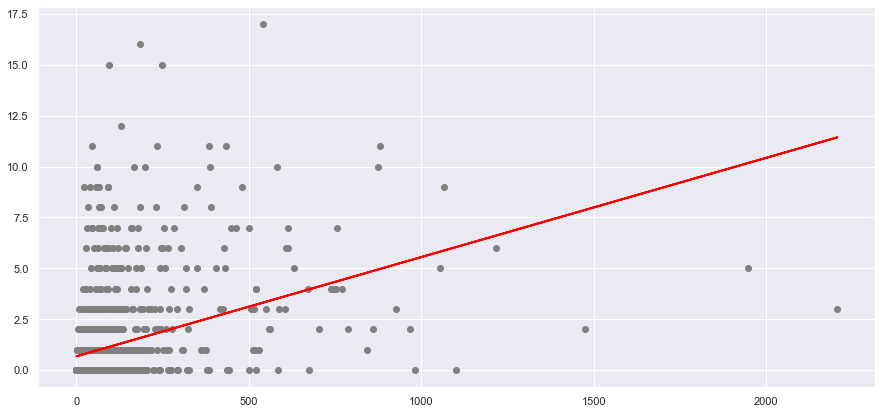

In [478]:
plt.figure(figsize=(15,7))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
#There is a positive correlation between Cases – Weekly
#and Deaths – Weekly, but it is not a very
#strong relationship, which is consistent with what we have been
#seeing from other parts of the world.

In [479]:
#Finding and getting rid of outliers
maxthreshold_Deaths = df['DeathsWeekly'].quantile(0.98)
maxthreshold_Deaths

8.0

In [480]:
df[df['DeathsWeekly']>maxthreshold_Deaths]

,ZIP Code,Week Number,Week Start,Week End,CasesWeekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,DeathsWeekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
277,60609,20,5/10/20,5/16/20,244.0,1321.0,397.0,2148.1,1010.0,3746.0,...,6091.6,0.3,0.3,11.0,43.0,17.9,69.9,61495.0,60609-2020-20,POINT (-87.653382 41.812017)
433,60608,24,6/7/20,6/13/20,47.0,1783.0,59.0,2251.1,972.0,7793.0,...,9839.0,0.1,0.2,10.0,61.0,12.6,77.0,79205.0,60608-2020-24,POINT (-87.670366 41.849879)
847,60623,48,11/22/20,11/28/20,389.0,7556.0,452.0,8788.2,2299.0,47647.0,...,55417.0,0.2,0.2,10.0,196.0,11.6,228.0,85979.0,60623-2020-48,POINT (-87.717446 41.850321)
848,60623,49,11/29/20,12/5/20,464.0,8020.0,540.0,9327.9,3046.0,50693.0,...,58959.7,0.2,0.2,9.0,205.0,10.5,238.4,85979.0,60623-2020-49,POINT (-87.717446 41.850321)
907,60617,3,1/16/22,1/22/22,271.0,14743.0,328.0,17862.9,5995.0,198854.0,...,240935.9,0.1,0.1,13.0,236.0,15.8,285.9,82534.0,60617-2022-3,POINT (-87.556897 41.721257)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,60647,21,5/17/20,5/23/20,133.0,1204.0,152.0,1375.9,931.0,4939.0,...,5644.0,0.2,0.2,13.0,69.0,14.9,78.8,87509.0,60647-2020-21,POINT (-87.701101 41.921058)
6119,60649,15,4/5/20,4/11/20,74.0,222.0,161.0,482.4,212.0,734.0,...,1594.8,0.3,0.3,12.0,22.0,26.1,47.8,46024.0,60649-2020-15,POINT (-87.571522 41.762202)
6120,60649,16,4/12/20,4/18/20,98.0,320.0,213.0,695.3,308.0,1042.0,...,2264.0,0.3,0.3,17.0,39.0,36.9,84.7,46024.0,60649-2020-16,POINT (-87.571522 41.762202)
6157,60620,4,1/23/22,1/29/22,97.0,11808.0,142.0,17340.2,5846.0,207484.0,...,304693.4,0.0,0.1,9.0,267.0,13.2,392.1,68096.0,60620-2022-4,POINT (-87.651656 41.740873)


In [481]:
df2=df[(df.DeathsWeekly<maxthreshold_Deaths)]
df2.shape

(6623, 21)

In [482]:
#Finding and getting rid of outliers
maxthreshold_Cases= df2['CasesWeekly'].quantile(0.98)
maxthreshold_Cases

567.0

In [483]:
df[df['CasesWeekly']>maxthreshold_Cases]

,ZIP Code,Week Number,Week Start,Week End,CasesWeekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,DeathsWeekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
45,60608,1,1/2/22,1/8/22,1225.0,13675.0,1547.0,17265.3,6964.0,214020.0,...,270210.2,0.2,0.1,3.0,183.0,3.8,231.0,79205.0,60608-2022-1,POINT (-87.670366 41.849879)
151,60608,2,1/9/22,1/15/22,729.0,14404.0,920.0,18185.7,6252.0,220272.0,...,278103.7,0.1,0.1,2.0,185.0,2.5,233.6,79205.0,60608-2022-2,POINT (-87.670366 41.849879)
235,60601,52,12/26/21,1/1/22,596.0,2912.0,4061.0,19843.3,2376.0,73828.0,...,503086.9,0.3,0.0,0.0,12.0,0.0,81.8,14675.0,60601-2021-52,POINT (-87.622844 41.886262)
454,60608,52,12/26/21,1/1/22,1377.0,12450.0,1738.0,15718.7,6478.0,207056.0,...,261417.8,0.2,0.1,4.0,180.0,5.1,227.3,79205.0,60608-2021-52,POINT (-87.670366 41.849879)
510,60609,2,1/9/22,1/15/22,668.0,12411.0,1086.0,20182.1,5483.0,166212.0,...,270285.4,0.1,0.1,7.0,194.0,11.4,315.5,61495.0,60609-2022-2,POINT (-87.653382 41.812017)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,60657,50,12/12/21,12/18/21,922.0,8510.0,1316.0,12148.1,10590.0,221439.0,...,316106.6,0.1,0.0,1.0,50.0,1.4,71.4,70052.0,60657-2021-50,POINT (-87.658216 41.939715)
7194,60657,51,12/19/21,12/25/21,1257.0,9767.0,1794.0,13942.5,12111.0,233550.0,...,333395.2,0.1,0.0,1.0,51.0,1.4,72.8,70052.0,60657-2021-51,POINT (-87.658216 41.939715)
7195,60657,52,12/26/21,1/1/22,983.0,10750.0,1403.0,15345.7,7009.0,240559.0,...,343400.6,0.2,0.0,0.0,51.0,0.0,72.8,70052.0,60657-2021-52,POINT (-87.658216 41.939715)
7200,60657,1,1/2/22,1/8/22,940.0,11690.0,1342.0,16687.6,7796.0,248355.0,...,354529.5,0.1,0.1,4.0,55.0,5.7,78.5,70052.0,60657-2022-1,POINT (-87.658216 41.939715)


In [484]:
df3=df[(df.CasesWeekly<maxthreshold_Cases)]
df3.shape

(6628, 21)

In [485]:
df4 = df[(df.CasesWeekly<maxthreshold_Cases) &(df.DeathsWeekly<maxthreshold_Deaths)]

In [486]:
X = df4['CasesWeekly'].values.reshape(-1,1)
y = df4['DeathsWeekly'].values.reshape(-1,1)

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [488]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [489]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.40888828]
[[0.0062249]]


In [490]:
y_pred = regressor.predict(X_test)

In [491]:
X_test

array([[ 32.],
       [102.],
       [ 24.],
       ...,
       [ 49.],
       [ 37.],
       [ 19.]])

In [492]:
y_pred

array([[0.60808523],
       [1.04382855],
       [0.55828599],
       ...,
       [0.71390861],
       [0.63920975],
       [0.52716147]])

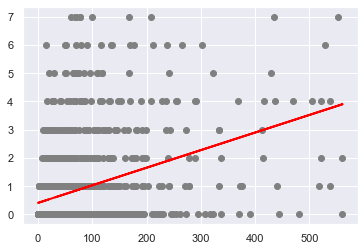

In [493]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
#Here we can see the relationship between CasessWeekly
#and DeathsWeekly with the outliers removed.
#There is a stronger relationsjp than before.

In [494]:
filter_data = df.dropna(subset=['CasesWeekly'])

/Users/rosemary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CasesWeekly'>

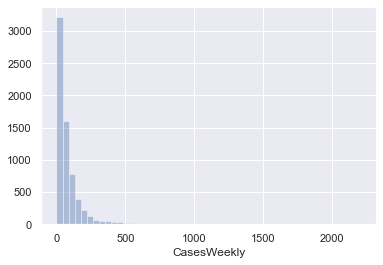

In [495]:
sns.distplot(filter_data['CasesWeekly'], kde=False)
#Cases – Weekly
#Mean 68.47
#Std 97.03
#Max 1231
#Min 0
#1st Q 14
#Median 36
#3rd Q 84

In [496]:
filter_data = df.dropna(subset=['DeathsWeekly'])

/Users/rosemary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


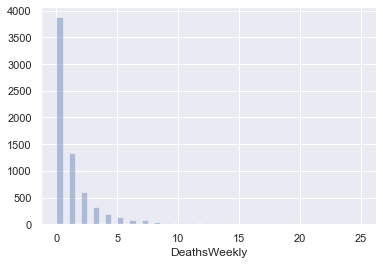

In [497]:
sns.distplot(filter_data['DeathsWeekly'], kde=False)
plt.rcParams["figure.figsize"] = (10,4)

#Deaths – Weekly
#Mean 1.34
#Std 2.39
#Max 25
#Min 0
#1st Q 0
#Median 0
#3rd Q 2

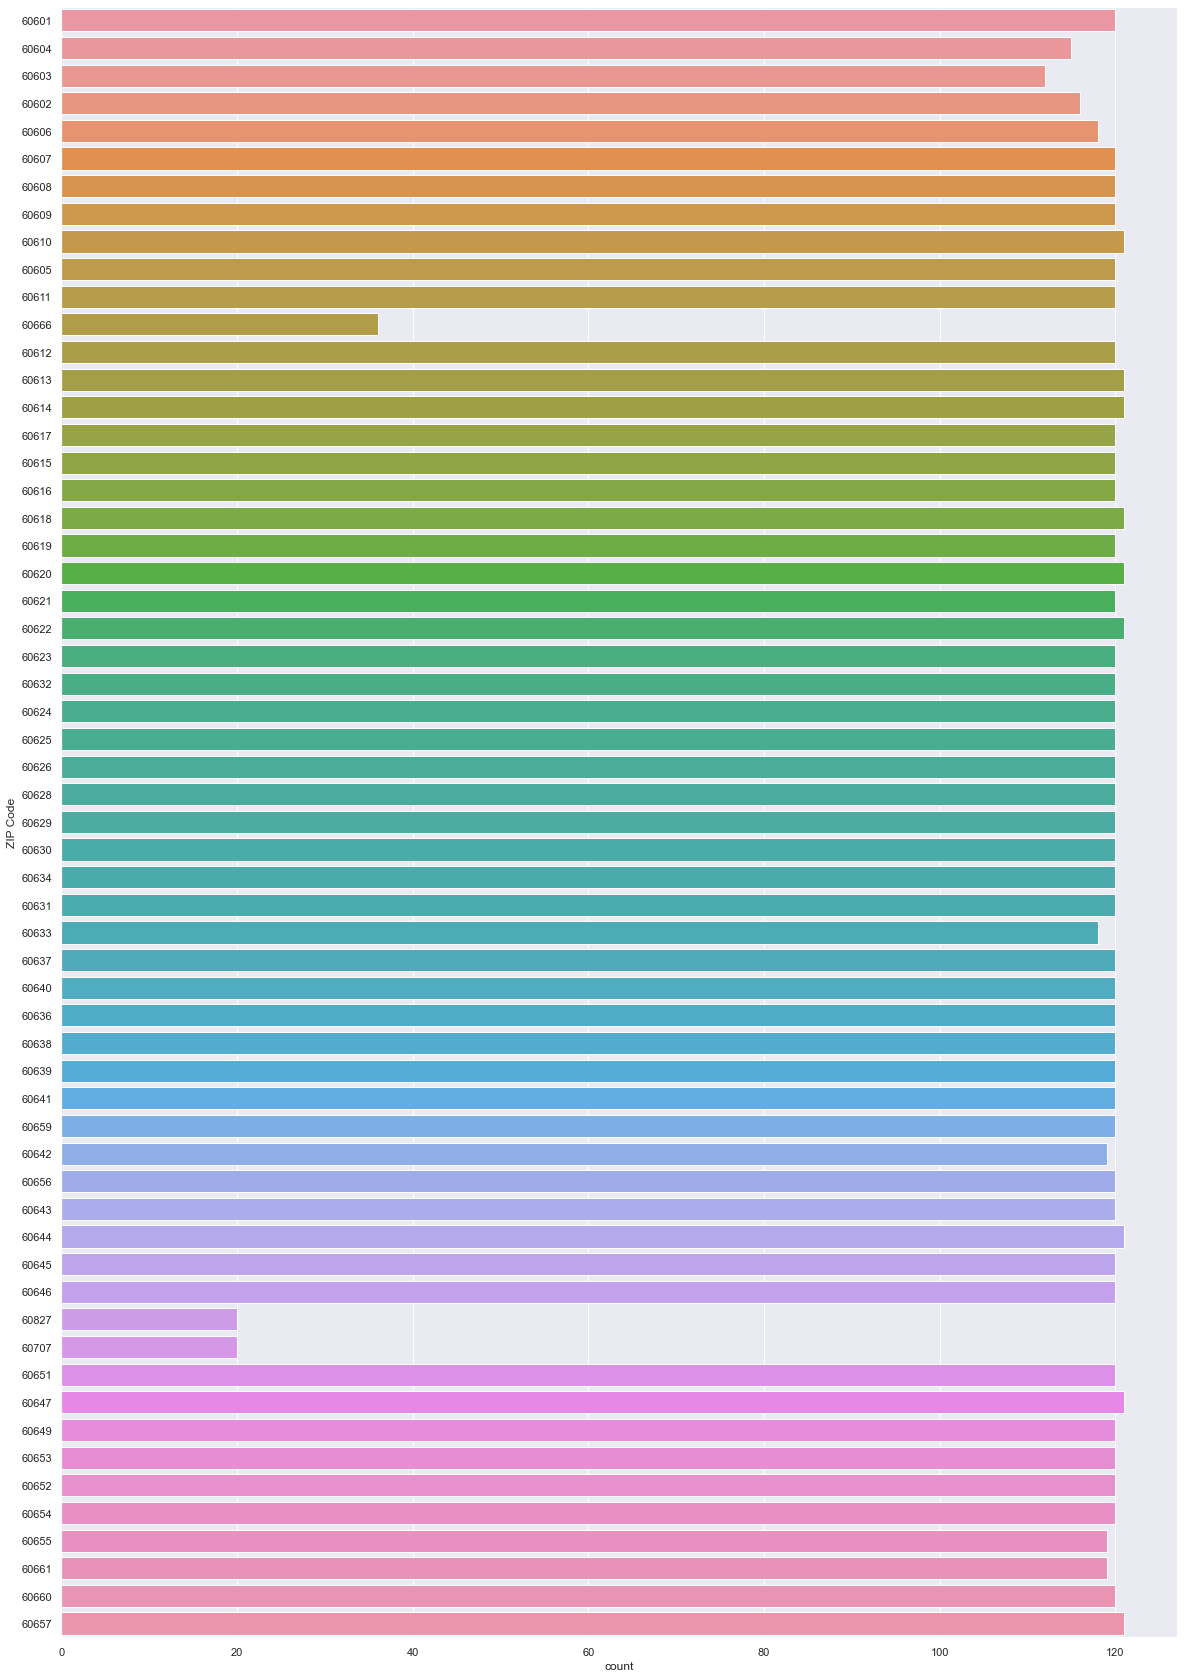

In [498]:
plt.figure(figsize=(20,30))
sns.set(style='darkgrid')
ax = sns.countplot(y='ZIP Code', data=df)
#The majority of zip codes had similar numbers

<AxesSubplot:>

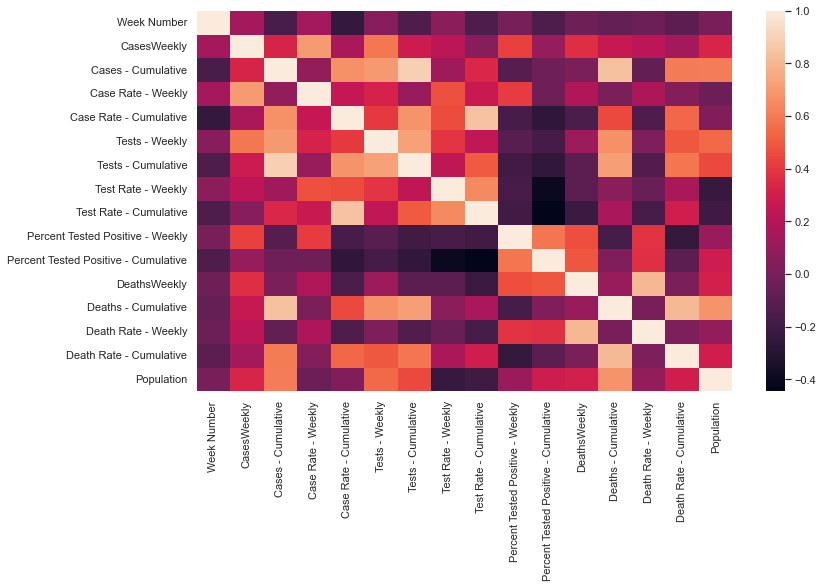

In [499]:
plt.figure(figsize=(12,7))
corr = df.corr(method='pearson')
sns.heatmap(corr)

In [500]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7319],
           dtype='int64', length=6781)

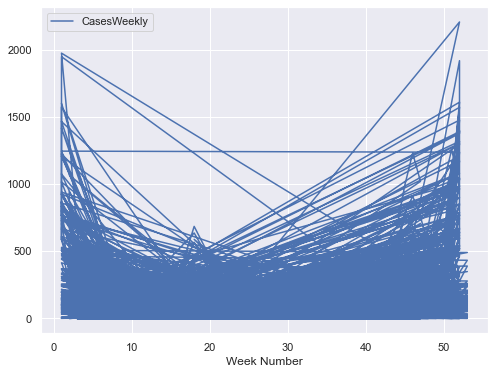

In [501]:
plt.rcParams["figure.figsize"] = (8, 6)
df.plot(x='Week Number', y='CasesWeekly')
plt.show()
#impossible to read due to the amount
#of records and overlapping data, but
#you can see that some weeks had significantly
#higher cases reported than others

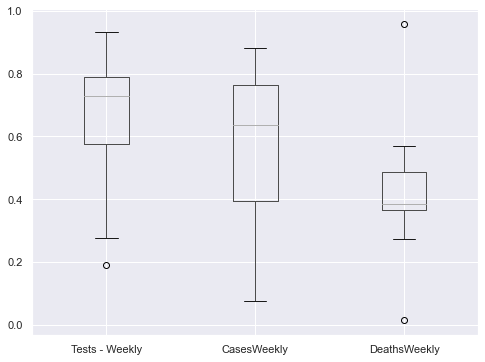

In [502]:
#plt.figure(figsize=(12,10))
np.random.seed(1234)
df=pd.DataFrame(np.random.rand(10,3),
columns=['Tests - Weekly', 'CasesWeekly', 'DeathsWeekly'])
boxplot = df.boxplot(column=['Tests - Weekly', 'CasesWeekly', 'DeathsWeekly'])
#These boxplots show that there is a huge range
#in Tests – Weekly, a smaller (but still large) range in Cases – Weekly,
#and a small range in Deaths – Weekly.